### CNN 이미지 분류 모델 : Fashion MNIST

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fashion MNIST imgae data 처리
# fashin_mnist 데이터 가져오기

fashion_mnist = tf.keras.datasets.fashion_mnist
# fashion_mnist = tf.keras.datasets.mnist   # 손글씨

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(28, 28)
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4]


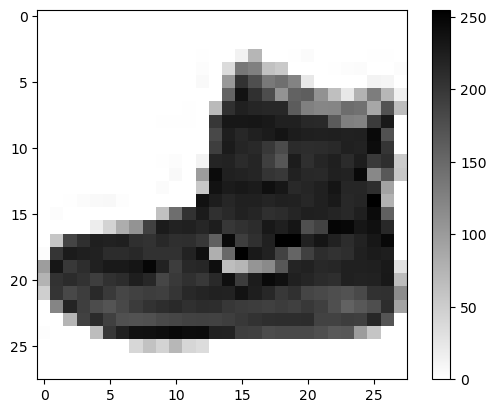

In [3]:
# 이미지 데이터 정보 및 시각화
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(x_train.shape,y_train.shape)  # (60000, 28, 28)  (60000,)
print(x_test.shape,y_test.shape)    # (10000, 28, 28) (10000,)
print(x_train[0].shape)             # (28,28)
print(y_train[:30])

plt.imshow(x_train[0],cmap=plt.cm.binary)
# plt.imshow(x_train[0],cmap='gray')
plt.colorbar()

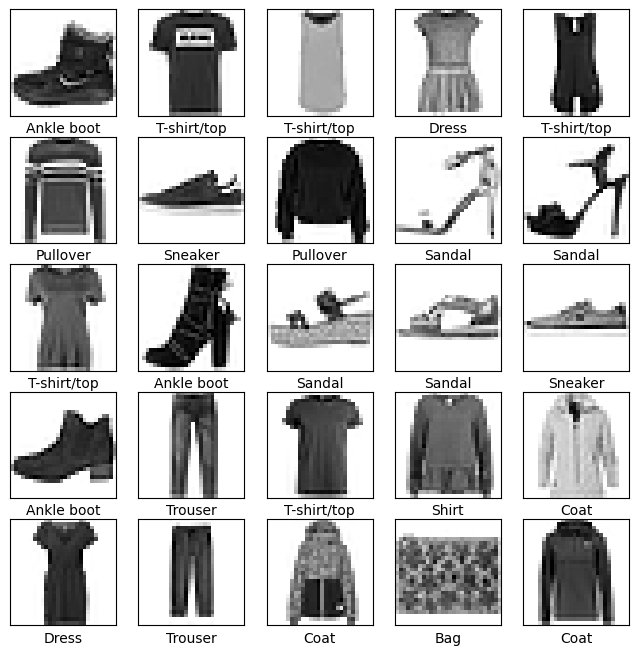

In [4]:
plt.figure(figsize=(8,8))         # 그래프 사이즈의 크기 설정, width,height, default:[6.4,4.8]
for k in range(25):
    plt.subplot(5,5,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[k],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[k]])

plt.show()

In [5]:
# 이미지 데이터 정규화(Normalization) : 0 ~ 255 ===> 0 ~ 1
x_train = x_train / 255.0  # max:255, min:0이므로
x_test = x_test / 255.0

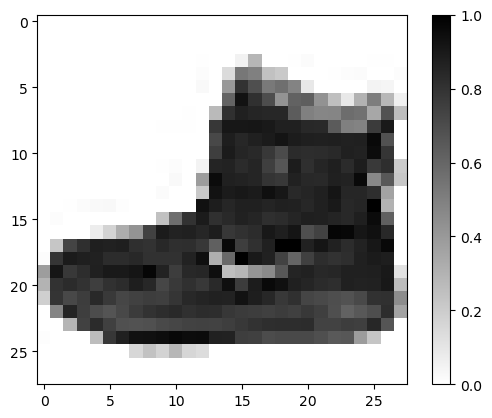

In [6]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.colorbar()

In [7]:
# 정규화 함수 직접 구현
# Z = (X-min())/(max()-min())
def normalizer(data):
    result = (data - np.min(data,axis=0))/(np.max(data,axis=0) - np.min(data,axis=0))
    return result
# x_train = normalizer(x_train)
# x_test = normalizer(x_test)

In [15]:
# 모델 생성  : CNN 사용 안함 --> Accuracy : 0.88
model = tf.keras.models.Sequential([
    # X: (None,28,28)  --> (None,784)
    tf.keras.layers.Flatten(input_shape=(28,28)),
    
    # (None,784) , W:(784,128) --> (None,128)
    tf.keras.layers.Dense(128,activation='relu'),
    
    # (None,128) , W: (128,10) ---> (None,10)
    tf.keras.layers.Dense(10,activation='softmax'),
])

model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 학습
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4988 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3775 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3391 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3148 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2971 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2806 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2692 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2591 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2464 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.238

In [17]:
# 평가
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3428 - accuracy: 0.8801


[0.3427862524986267, 0.8801000118255615]

In [18]:
# 예측
preds = model.predict(x_test)
print(preds[0])
print(y_test[0])

313/313 [==============================] - 1s 2ms/step
[8.6770791e-07 3.5604972e-10 9.7432293e-09 3.8720255e-10 1.2502551e-06
 2.7195343e-03 8.8841343e-06 2.8000986e-03 5.2023495e-07 9.9446893e-01]
9


### CNN 사용 모델 구현

In [20]:
# loading Fashion MNIST data

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train = x_train / 255.0     
x_test = x_test / 255.0
print(x_train.shape,y_train.shape)  # (N,H,W,C)
print(x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [29]:
# 모델 구현 : conv-relu-max_pool-conv-relu-max_pool-flatten-dense-dense
model = tf.keras.Sequential([
    # (28 - 3)/1 + 1 = 26, W : (3,3,64) = 576 , b : 64 --> 576 + 64 = 640(Param)
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    # (26 - 2)/2 + 1 = 13
    tf.keras.layers.MaxPooling2D(2,2), # MaxPooling2D((2,2),(2,2))
    # (13 - 3)/1 + 1 = 11, W : (3,3,64)*64 = 36864 , b : 64 --> 36864 + 64 = 36928(Param)
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    # (11 - 2)/2 + 1 = 5
    tf.keras.layers.MaxPooling2D(2,2), # MaxPooling2D((2,2),(2,2))
    tf.keras.layers.Flatten(),
    # (None,1600) * (1600,128) = (None,128) , 1600*128 + 128 = 204,928(Param)
    tf.keras.layers.Dense(128,activation='relu'),
    # (None,128) * (128,10) = (None,10)  , 128*10 + 10 = 1290
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [30]:
# 학습  : CPU 7~8분 소요
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.4507 - accuracy: 0.8366
Epoch 2/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2974 - accuracy: 0.8915
Epoch 3/5
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2515 - accuracy: 0.9063
Epoch 4/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2193 - accuracy: 0.9183
Epoch 5/5
1875/1875 [==============================] - 113s 60ms/step - loss: 0.1901 - accuracy: 0.9290


In [31]:
# 평가
model.evaluate(x_test,y_test)  # 0.909  , 약간 성능 향상

313/313 [==============================] - 4s 10ms/step - loss: 0.2499 - accuracy: 0.9092


[0.24990344047546387, 0.9092000126838684]

In [32]:
# 정확도 약간 개선된 모델
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

# 학습 : CPU 4~5분 소요
model.fit(x_train,y_train,epochs=5) # epochs=30

# 평가
model.evaluate(x_test,y_test)  # 0.9125 , 성능 향상

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 5408)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               692352    
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_______________________________________________

[0.24662204086780548, 0.9125000238418579]